In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime

In [2]:
df_msft = pdr.get_data_yahoo('MSFT')

In [8]:
df_msft.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-03-02  64.750000  63.880001  64.690002  64.010002  24539600.0  59.752350
2017-03-03  64.279999  63.619999  63.990002  64.250000  18135900.0  59.976395
2017-03-06  64.559998  63.810001  63.970001  64.269997  18750300.0  59.995064
2017-03-07  64.779999  64.190002  64.190002  64.400002  18521000.0  60.116425
2017-03-08  65.080002  64.250000  64.260002  64.989998  21510900.0  60.667168

In [9]:
df_msft.tail()

High         Low        Open       Close      Volume  \
Date                                                                     
2022-02-23  291.700012  280.100006  290.179993  280.269989  37811200.0   
2022-02-24  295.160004  271.519989  272.510010  294.589996  56989700.0   
2022-02-25  297.630005  291.649994  295.140015  297.309998  32546700.0   
2022-02-28  299.140015  293.000000  294.309998  298.790009  34585700.0   
2022-03-01  299.970001  292.149994  296.399994  294.950012  31188900.0   

             Adj Close  
Date                    
2022-02-23  280.269989  
2022-02-24  294.589996  
2022-02-25  297.309998  
2022-02-28  298.790009  
2022-03-01  294.950012

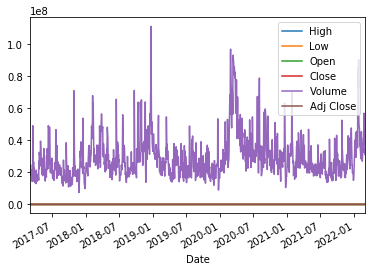

In [4]:
df_msft.plot()

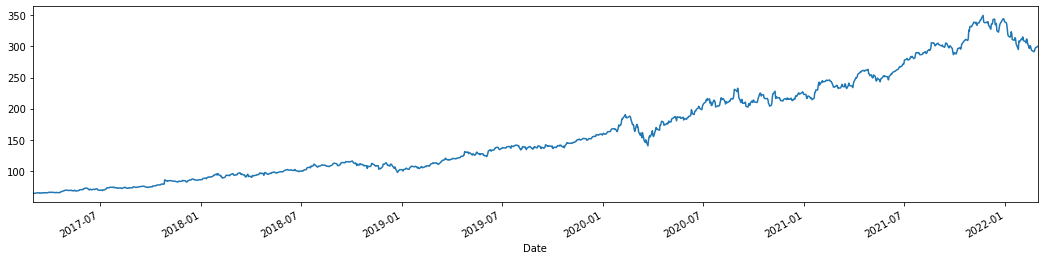

In [51]:
df_msft['High'].plot(figsize=(18,4))

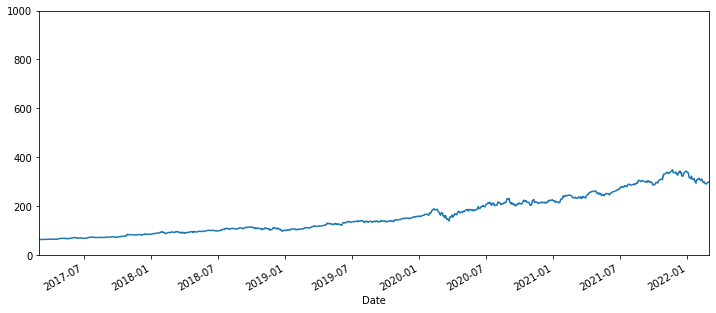

In [52]:
df_msft['High'].plot(xlim=['2017-3-2', '2022-3-1'], ylim=[0,1000],figsize=(12,5))

In [20]:
# selective indices
index = df_msft.loc['2020-01-01':'2021-09-03'].index

In [21]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-23', '2021-08-24', '2021-08-25', '2021-08-26',
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03'],
              dtype='datetime64[ns]', name='Date', length=423, freq=None)

In [23]:
share_open = df_msft.loc['2020-01-01':'2021-09-03'][['Open','Close']]

In [24]:
share_open

Open       Close
Date                              
2020-01-02  158.779999  160.619995
2020-01-03  158.320007  158.619995
2020-01-06  157.080002  159.029999
2020-01-07  159.320007  157.580002
2020-01-08  158.929993  160.089996
...                ...         ...
2021-08-30  301.119995  303.589996
2021-08-31  304.420013  301.880005
2021-09-01  302.869995  301.829987
2021-09-02  302.200012  301.149994
2021-09-03  300.989990  301.140015

[423 rows x 2 columns]

In [25]:
import matplotlib.pyplot as plt

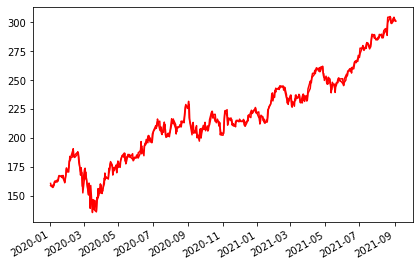

In [27]:
figure,axis = plt.subplots()
plt.tight_layout()
figure.autofmt_xdate()
axis.plot(index, share_open, c='red')

# Time Resampling

In [45]:
df_msft.head()

High        Low       Open      Close      Volume  Adj Close
Date                                                                         
2017-03-02  64.750000  63.880001  64.690002  64.010002  24539600.0  59.752350
2017-03-03  64.279999  63.619999  63.990002  64.250000  18135900.0  59.976395
2017-03-06  64.559998  63.810001  63.970001  64.269997  18750300.0  59.995064
2017-03-07  64.779999  64.190002  64.190002  64.400002  18521000.0  60.116425
2017-03-08  65.080002  64.250000  64.260002  64.989998  21510900.0  60.667168

In [32]:
maxOfOpenEveryYear = df_msft.resample(rule="A").max()['Open']

In [40]:
maxOfOpenEveryYear

Date
2017-12-31     87.120003
2018-12-31    115.419998
2019-12-31    159.449997
2020-12-31    229.270004
2021-12-31    344.619995
2022-12-31    335.350006
Freq: A-DEC, Name: Open, dtype: float64

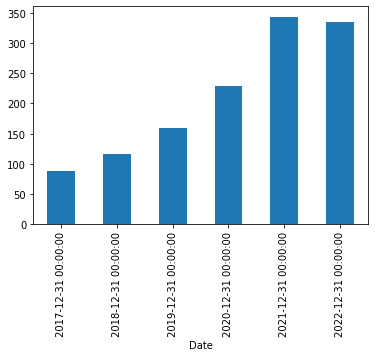

In [36]:
maxOfOpenEveryYear.plot(kind ='bar')

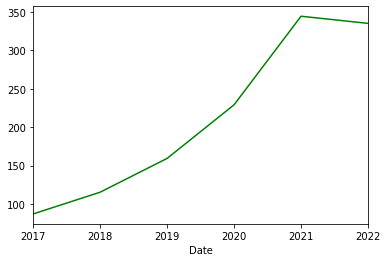

In [37]:
maxOfOpenEveryYear.plot(c='green')

In [49]:
maxOfOpenEveryYear.idxmax()

Timestamp('2021-12-31 00:00:00', freq='A-DEC')

In [50]:
maxOfOpenEveryYear.idxmin()

Timestamp('2017-12-31 00:00:00', freq='A-DEC')